In [7]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('im140.dcm')
# Let's print all the Metadata here
print('The manafuture(im104.dcm) of the machine is '+str(RefDs.Manufacturer))
# Get file
RefDs = dicom.read_file('im140.dcm')
print(RefDs)

The manafuture(im104.dcm) of the machine is GE MEDICAL SYSTEMS
(0008, 0000) Group Length                        UL: 566
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20080603'
(0008, 0013) Instance Creation Time              TM: '073058'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.55.3.1284421438.720.1212483672.467.140
(0008, 0020) Study Date                          DA: '20080603'
(0008, 0021) Series Date                         DA: '20080603'
(0008, 0022) Acquisition Date                    DA: '20080603'
(0008, 0023) Content Date                        DA: '20080603'
(0008, 0030) Study Time                          TM: '072857'
(0008, 0031) Series Time                         TM: '073007'
(0008, 0032) Acquisition Time              

In [9]:
from datetime import datetime

print('The image is '+str(RefDs.Rows)+'x'+str(RefDs.Columns)+' pixels')
print('The image was encoded with '+str(RefDs.BitsStored)+' bits ')
print('The manufacturer is '+str(RefDs.Manufacturer)+' and the model is '+str(RefDs.ManufacturersModelName))
d=datetime.strptime(RefDs.AcquisitionDate,'%Y%m%d')
print('The image was made on '+str(d.date()))

if RefDs.PatientsSex=='F':
    print('The patient imaged is Female')
else:
    print('The patient imaged is Male')
if RefDs.PatientsName=='':
    print('The patient\'s name is unkown')
else:
    print('The patient\'s name is '+str(RefDs.PatientsName))

The image is 512x512 pixels
The image was encoded with 16 bits 
The manufacturer is GE MEDICAL SYSTEMS and the model is LightSpeed VCT
The image was made on 2008-06-03
The patient imaged is Male
The patient's name is unkown


[0, 511, 0, 511]

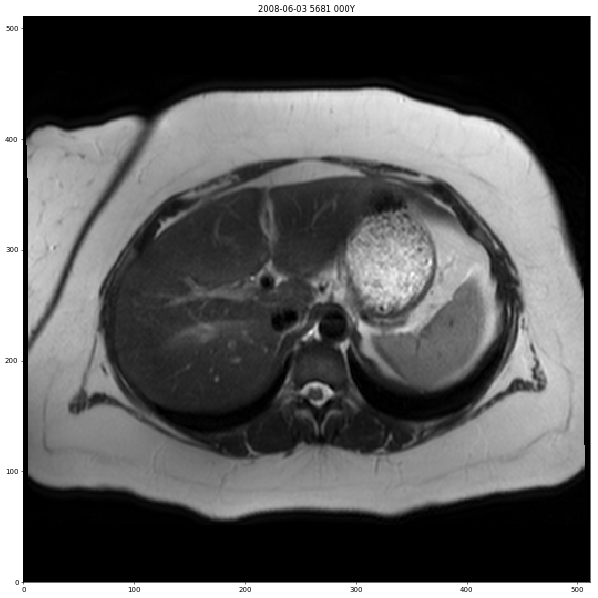

In [24]:
# add title and increase figure size

ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('IM_0028.dcm')
ArrayDicom[:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(15, 15), dpi= 50, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
plt.title(str(d.date())+' '+str(RefDs.PatientID)+' '+str(RefDs.PatientsAge)) # title of the image
plt.axis([x.min(),x.max(),y.min(),y.max()])


